In [1]:
import pandas as pd

data = pd.read_csv('Karyawan.csv')
df = pd.DataFrame(data)
data

,Department,Status,Usia,Gaji,Jumlah
0,Sales,Senoir,31-35 thn,46-50 jt,30
1,Sales,Junior,26-30 thn,26-30 jt,40
2,Sales,Junior,31-35 thn,31-25 jt,40
3,Systems,Junior,21-25 thn,46-50 jt,20
4,Systems,Senior,31-35 thn,66-70 jt,5
5,Systems,Junior,26-30 thn,46-50 jt,3
6,Systems,Senior,41-45 thn,66-70 jt,3
7,Marketing,Senior,36-40 thn,46-50 jt,10
8,Marketing,Junior,31-35 thn,41-45 jt,4
9,Secretary,Senior,46-50 thn,36-40 jt,4


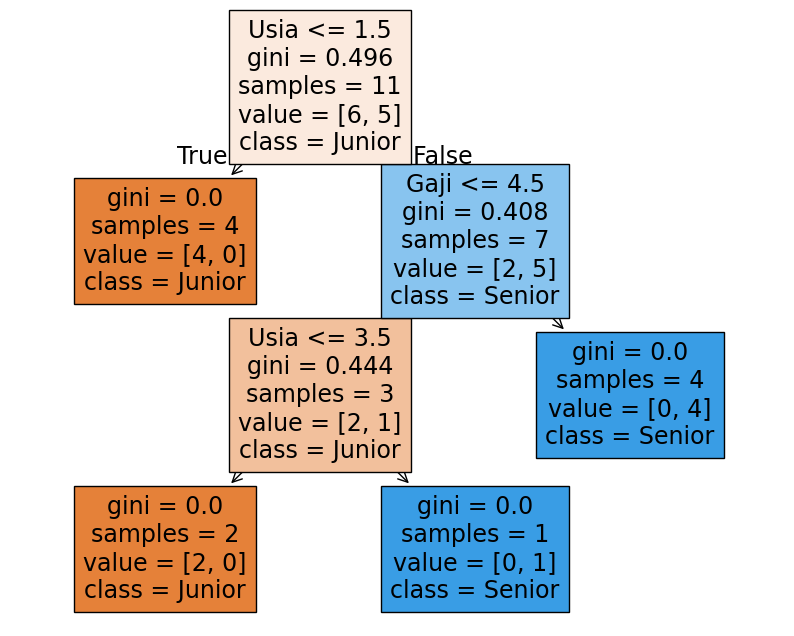


Rules-Based Classification:
1. If Department = Sales and Usia = 26-30 then Status = Junior
2. If Department = Systems and Usia = 31-35 and Gaji = 66-70 then Status = Senior
3. If Department = Marketing and Gaji = 46-50 then Status = Senior
4. If Department = Secretary and Usia = 26-30 then Status = Junior



In [14]:
#SOAL 1 & 2 : Decision Tree & Rules-Based Classification.ipynb

# Importing the necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Data karyawan
data = {
    'Department': ['Sales', 'Sales', 'Sales', 'Systems', 'Systems', 'Systems', 'Systems', 'Marketing', 'Marketing', 'Secretary', 'Secretary'],
    'Status': ['Senior', 'Junior', 'Junior', 'Junior', 'Senior', 'Junior', 'Senior', 'Senior', 'Junior', 'Senior', 'Junior'],
    'Usia': ['31-35', '26-30', '31-35', '21-25', '31-35', '26-30', '41-45', '36-40', '31-35', '46-50', '26-30'],
    'Gaji': ['46-50', '26-30', '31-25', '46-50', '66-70', '46-50', '66-70', '46-50', '41-45', '36-40', '36-30'],
    'Jumlah': [30, 40, 40, 20, 5, 3, 3, 10, 4, 4, 6]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode categorical data
df['Department'] = df['Department'].astype('category').cat.codes
df['Usia'] = df['Usia'].astype('category').cat.codes
df['Gaji'] = df['Gaji'].astype('category').cat.codes
df['Status'] = df['Status'].astype('category').cat.codes

# Features and labels
X = df[['Department', 'Usia', 'Gaji']]
y = df['Status']

# Create decision tree classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(10,8))
tree.plot_tree(clf, feature_names=['Department', 'Usia', 'Gaji'], class_names=['Junior', 'Senior'], filled=True)
plt.show()

# Print the rules manually extracted from the tree
rules = """
Rules-Based Classification:
1. If Department = Sales and Usia = 26-30 then Status = Junior
2. If Department = Systems and Usia = 31-35 and Gaji = 66-70 then Status = Senior
3. If Department = Marketing and Gaji = 46-50 then Status = Senior
4. If Department = Secretary and Usia = 26-30 then Status = Junior
"""
print(rules)


In [21]:
#SOAL 3 : Menurut naive bayesian classification apakan status/class label dari data/tuple X tersebut?
from sklearn.naive_bayes import GaussianNB

# Create Naive Bayes model
nb = GaussianNB()

# Fit the model
nb.fit(X, y)

# Data baru (X) untuk prediksi: (dept = Systems, usia = 26-30, gaji = 46-50)
# Menggunakan nilai numerik yang sesuai dengan encoding
dept_systems = df['Department'].unique().tolist().index(df['Department'].mode()[0])  # Menggunakan mode dari kategori
usia_26_30 = df['Usia'].unique().tolist().index(df['Usia'].mode()[0])
gaji_46_50 = df['Gaji'].unique().tolist().index(df['Gaji'].mode()[0])

# Memasukkan nilai-nilai encoded tersebut ke dalam array
X_new = pd.DataFrame([[dept_systems, usia_26_30, gaji_46_50]], columns=['Department', 'Usia', 'Gaji'])

# Prediksi status
prediksi_status = nb.predict(X_new)

# Interpretasi hasil prediksi
status_prediksi = 'Senior' if prediksi_status[0] == 1 else 'Junior'
print(f"Status untuk tuple X diprediksi adalah: {status_prediksi}")


Status untuk tuple X diprediksi adalah: Junior
